<div style="float: right;"><h4 style="margin: 2px; padding: 2px;">Scott Enderle</h4><h4 style="margin: 2px; padding: 2px;"><a href="https://twitter.com/scottenderle" style="text-decoration:none;">@scottenderle</a>, <a href="http://www.lagado.name/blog/" style="text-decoration:none;">etc</a></h4></div> 
<!-- Google Analytics -->
<script>
      (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
      (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
      m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
      })(window,document,'script','https://www.google-analytics.com/analytics.js','ga');
    
      ga('create', 'UA-83883852-1', 'auto');
      ga('send', 'pageview');
    
</script>

# A Plot of Brownian Noise
<img src="brownian-noise.png" alt="A Plot of Brownian Noise" style="width: 350px; float: right; margin: 15px;"/>
This notebook illustrates some of the behaviors of the singular value decomposition of time series data. I've written it in part as a response to [a paper](https://arxiv.org/pdf/1606.07772v2.pdf) by Andrew J. Reagan, Lewis Mitchell, Dilan Kiley, Christopher M. Danforth, and Peter Sheridan Dodds recapitulating an argument first made by [Matt Jockers](http://www.matthewjockers.net/2015/02/25/the-rest-of-the-story/): that certain kinds of eigendecompositions of sentiment data from works of fiction will reveal "fundamental plot structures" or "fundamental narrative arcs."

I have doubts about that argument that I [discussed](http://www.lagado.name/blog/sine-of-the-times/) during the [wave](https://storify.com/clancynewyork/contretemps-a-syuzhet) of [debates](https://storify.com/clancynewyork/a-fabula-of-syuzhet-ii) inspired by Annie Swafford's [initial critique](https://annieswafford.wordpress.com/syuzhet-blog-posts/). At first glance, Reagan et. al. seem to address some of those doubts. But after going over their paper more carefully, I have come to an even more skeptical conclusion: I think that if they have shown anything at all, they have shown that sentiment time series data from works of fiction is best modeled by a particular kind of noise.

If that's correct, it's a strong indication that researchers in this area should shift their attention away from grand generalizations and towards more local inquiries. However, it might also validate some aspects of Jockers' original program, because it could provide some very weak evidence that the space of sinusoidal curves may indeed provide the best representation of sentiment time series data. Whether it does so remains an open question, because we don't know enough about the methods Reagan et. al. used.

Although I'm making it public now, this notebook is a work in progress, and I would appreciate feedback of any kind, as well as citations to other work that covers similar ground -- which I am sure exists, but haven't yet found. I am indebted to Annie Swafford, Dan Lepage, Matt Jockers, Molly Des Jardin, Beth Seltzer, and Lindsay Van Tine for their extensive comments on earlier drafts of this notebook.

### Singular value decomposition and latent structure

In my initial response to Jockers' work, I emphasized that we had no particular reason to assume that a sinusoidal decomposition would reflect anything meaningful about plot. Until we could justify that assumption, I argued, we could not draw meaningful conclusions from Jockers' method, which used a Fourier series decomposition to produce sine waves of sentiment. Without knowing what a sine wave of sentiment was, we could not know how to interpret the results. But Reagan et. al. use a different approach. They take the singular value decomposition (SVD) of sentiment time series data that they extracted from many hundreds of works from Project Gutenberg. Because the SVD places fewer restrictions on the structure of the decomposition that it produces, their approach avoids making the same assumptions.

When I saw that the SVD also produces sinusoidal functions from their sentiment time series data, I was startled, and began to reconsider my position on Jockers' original work. It turns out that there really may be a reason to represent sentiment time series data as a sum of sine waves. The reason is given by the [Karhunen-Loève theorem](https://en.wikipedia.org/wiki/Karhunen%E2%80%93Lo%C3%A8ve_theorem#The_Wiener_process), which shows that the canonical form taken by the SVD of a particular kind of noise, Brownian noise, is a set of Fourier-like sinusoidal functions. So using Fourier transforms to smooth sentiment data may be justified after all. But if so, it's justified because sentiment data behaves in the general case like plain, perfectly unpredictable Brownian noise -- that is, noise produced by [random walks](https://en.wikipedia.org/wiki/Random_walk). 

We can't yet know for certain whether sentiment data from fiction really behaves like Brownian noise. It's possible that the sinusoidal shapes that Reagan et. al. report are merely side-effects of their smoothing process. The results they report may provide some weak evidence against that conclusion, but not enough to be convincing: almost all of the results they report are also consistent with the results one sees from aggressively smoothed white noise.

The following code and comments show that many of the results reported in Reagan et. al. can be reproduced simply by transforming Brownian or white noise. I have not reproduced every result reported in the paper; the self-organizing map they create, in particular, is difficult to interpret or validate, and I haven't tried to reimplement it here. But the other results they report are easy to recreate with randomly generated data. The most compelling argument they provide for their thesis relies on the way the SVD differs when "word salad" sentiment data is substituted in place of data from the original texts. But as I show below, those differences can be replicated simply by rescaling the original data.

Furthermore, there's evidence that if there really were fundamental narrative arcs that were not explained by the properties of Brownian noise, they would likely be revealed immediately by the SVD. To show this, the code below generates a set of fixed arcs and adds Brownian noise to them. The SVD of the resulting data produces complex base shapes that are obviously non-sinusoidal. The fact that no such functions appear among those shown by Reagan et. al. strongly suggests that if there are indeed fundamental narrative arcs, they are almost purely sinusoidal, and have no particular significance except as signs of Brownian noise.

### Global randomness vs. local structure

None of this necessarily means that there are not any fundamental plot structures. Nor does it necessarily mean that there are not other "laws" of plot that we have not yet discovered. It does suggest, however, that by continuing to analyze sentiment time series data this way, we are barking up the wrong tree. The sinusoidal curves Reagan et. al. found may be nothing more than smoothing artifacts. But even if they are more than smoothing artifacts, they are easily explained by the simple hypothesis that the sentimental arcs of works of fiction are, in general, random walks. To produce findings of any additional significance, researchers will need to show phenomena that cannot easily be explained by that model.

On the other hand, the structures of fiction belonging to particular genres, of fiction written at particular times or places, and of fiction created by particular writers or schools of writers may not be modeled by random walks. If correct, the random walk model might even lead us to _expect_ local regularities at a given scale of analysis. Patterns of imitation and historical influence might be traceable using sentiment analysis, especially now that the method is being more thoroughly validated by [human readers](http://www.matthewjockers.net/2016/08/11/more-syuzhet-validation/). It might even make sense to use Fourier transforms to do the tracing, contrary to what I [previously argued](http://www.matthewjockers.net/2015/04/06/epilogue/). But the random walk model provides no reason to believe that those patterns will be predictable over the long term, or have any regularities that justify grand generalizations about _Homo Narrativus_. Rather than continuing to look for universal laws where there probably are none, we should start producing historically informed work based on these tools.

## A Noise Generator
Generates soothing sounds for baby. (And null hypotheses.)

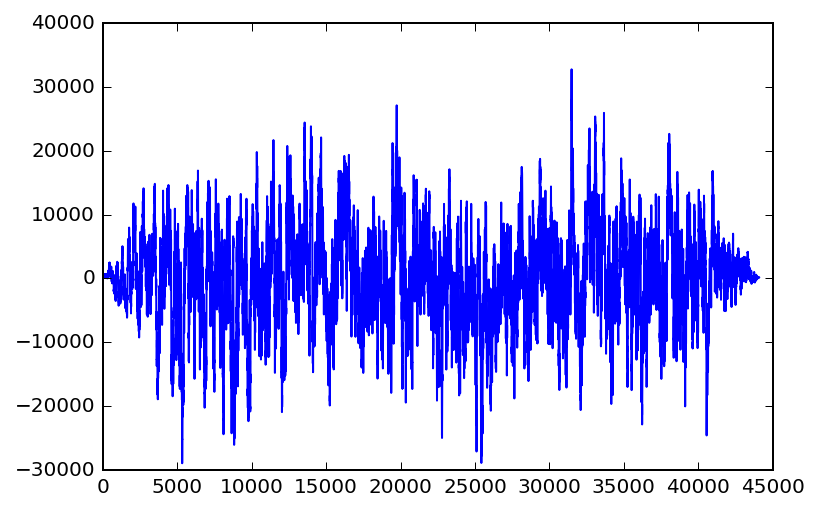

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'png2x'
import matplotlib.pyplot as plt

import numpy
from scipy.io import wavfile
from scipy import signal
from scipy import cluster

from noise import Noise
    
def plot_bases(bases, rows, cols, xbins, ybins):
    maxval = max(max(b.ravel()) for b in bases)
    minval = min(min(b.ravel()) for b in bases)
    span = maxval - minval
    maxval = maxval + span * 0.2
    minval = minval - span * 0.2
    
    fig = plt.figure(figsize=(cols * 2.25, rows * 2))
    for i, base in enumerate(bases):
        plt.subplot(rows, cols, i + 1)
        plt.locator_params(axis='x', nbins=xbins)
        plt.locator_params(axis='y', nbins=ybins)
        plt.axis([0, len(base), maxval, minval])
        plt.plot(base)

    plt.tight_layout()
    plt.show()

demo_noise = Noise(duration=1).brownian().butter_filter().fade()
plt.plot(demo_noise.wav())
plt.show()
# wavfile.write('test.wav', demo_noise.sample_rate, demo_noise.wav())

This is somewhat filtered, so that the sound is easier to hear. (Yes, this literally generates sound. Uncomment the last line above to save a `.wav` file.)

Let's start our analysis with unfiltered Brownian noise...

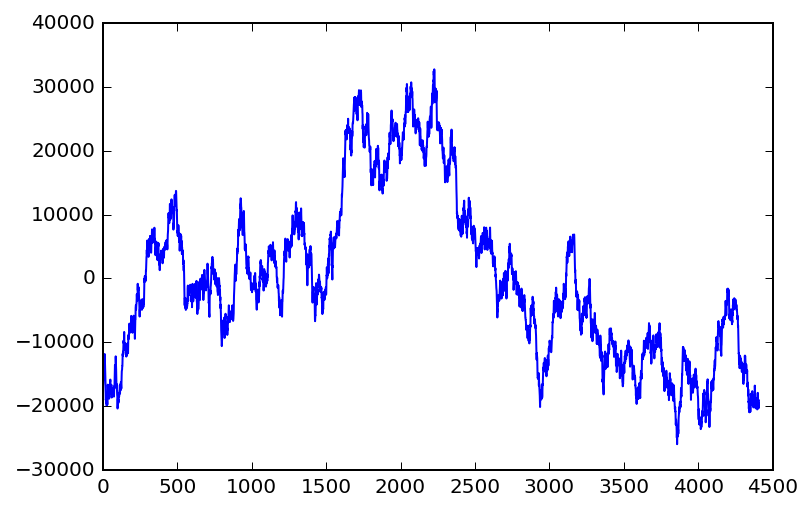

In [2]:
samples_brn = Noise(duration=0.1).brownian().resample_array(n_cols=2000)
plt.plot(samples_brn[:, 0])
plt.show()

## Creating the SVD

Now we can perform singular value decomposition on the samples generated above. The shape of the basis vector functions is not predetermined; if you pass in white noise, they also look like white noise. But if you pass in Brownian noise, they look just like the basis functions of a Fourier series. These basis functions are guaranteed to produce the best approximation of the input, even when truncated; that's the essence of the Karhunen-Loève theorem.

In [3]:
U, s, V = numpy.linalg.svd(samples_brn, full_matrices=False)

Let's also verify that the SVD operation has produced reasonable results. Then we can start plotting eigenfunctions.

In [4]:
numpy.allclose(samples_brn, U @ numpy.diag(s) @ V)

True

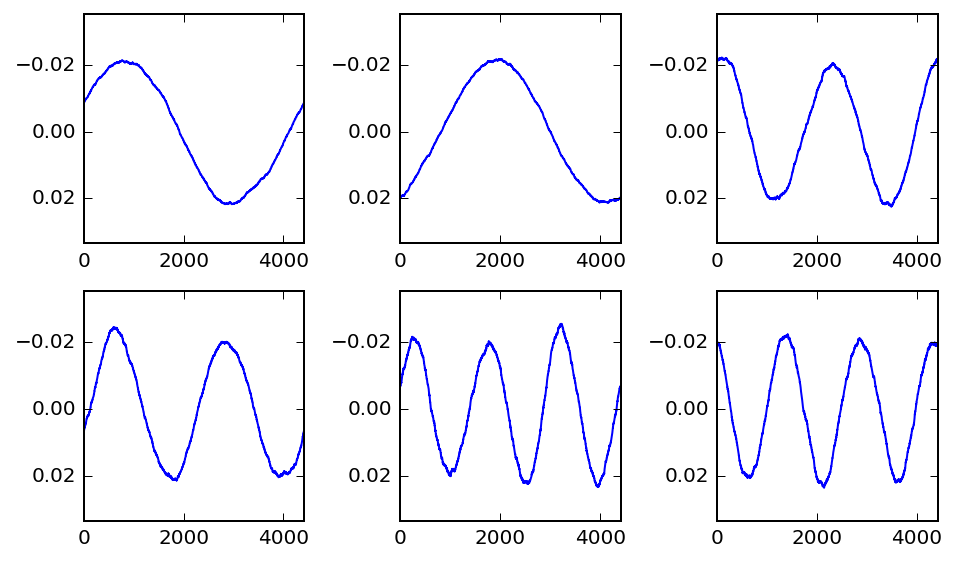

In [5]:
bases = [U[:,i] for i in range(6)]
plot_bases(bases, rows=2, cols=3, xbins=3, ybins=5)

Here are a few of the most significant basis functions. They 
might be a little off -- frequently they are not centered in 
the way one might expect. But they consistently look like 
sinusoidal curves with increasing frequencies, maybe with
a bit of peach fuzz. They are almost identical to the
functions that Reagan et. al. show in their paper.

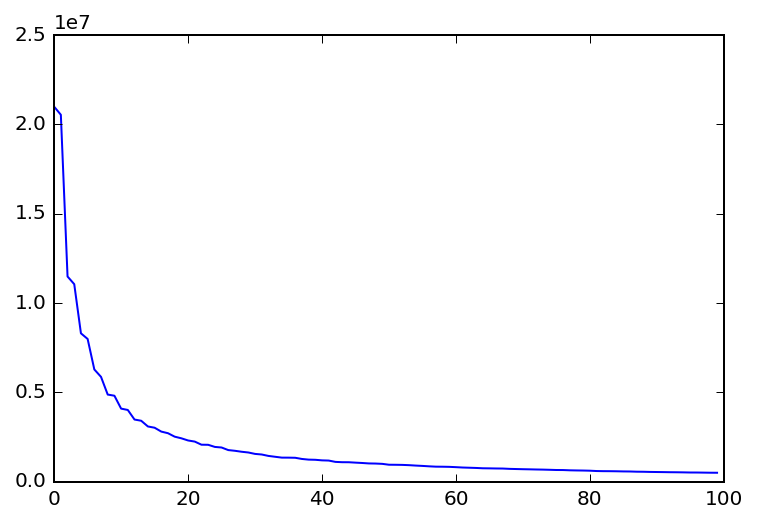

In [6]:
plt.plot(s[0:100])
plt.show()

The above plot indicates how significant each of the basis functions
are. As you can see, their significance drops off rapidly.

Note that the rate of drop-off can be modified by increasing or decreasing
the overall power of the noise. To produce basis functions with lower
singular values, just reduce the amplitude. Here's a plot comparing the 
above data and a muted version of the same data:

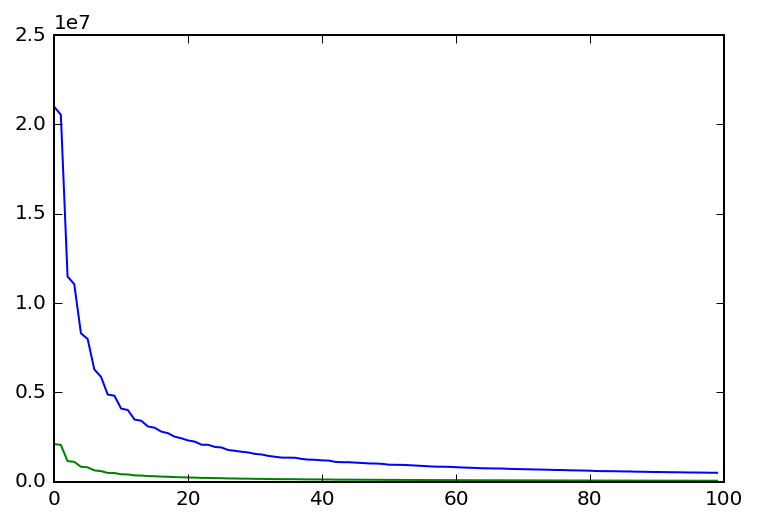

In [7]:
samples_low = samples_brn / 10
U_low, s_low, V_low = numpy.linalg.svd(samples_low, full_matrices=False)
plt.plot(s[0:100])
plt.plot(s_low[0:100])
plt.show()

According to Reagan et. al. the difference between these two lines indicates "less important ordering of the 
singular vectors." But I've reproduced it here just by rescaling the input.

## Clustering

The paper also does a cluster analysis of the sentiment curves, using Ward linkage. Ward linkage tries to create clusters that minimize the variance within each cluster, and since variance is closely related to the mean square error metric that SVD minimizes, we should expect to see similar results. `scipy` has everything we need in its `hierarchy` package:

In [8]:
# 'cityblock' isn't compatible with 'ward'
clusters = cluster.hierarchy.linkage(samples_brn.T, 'ward', 'euclidean')

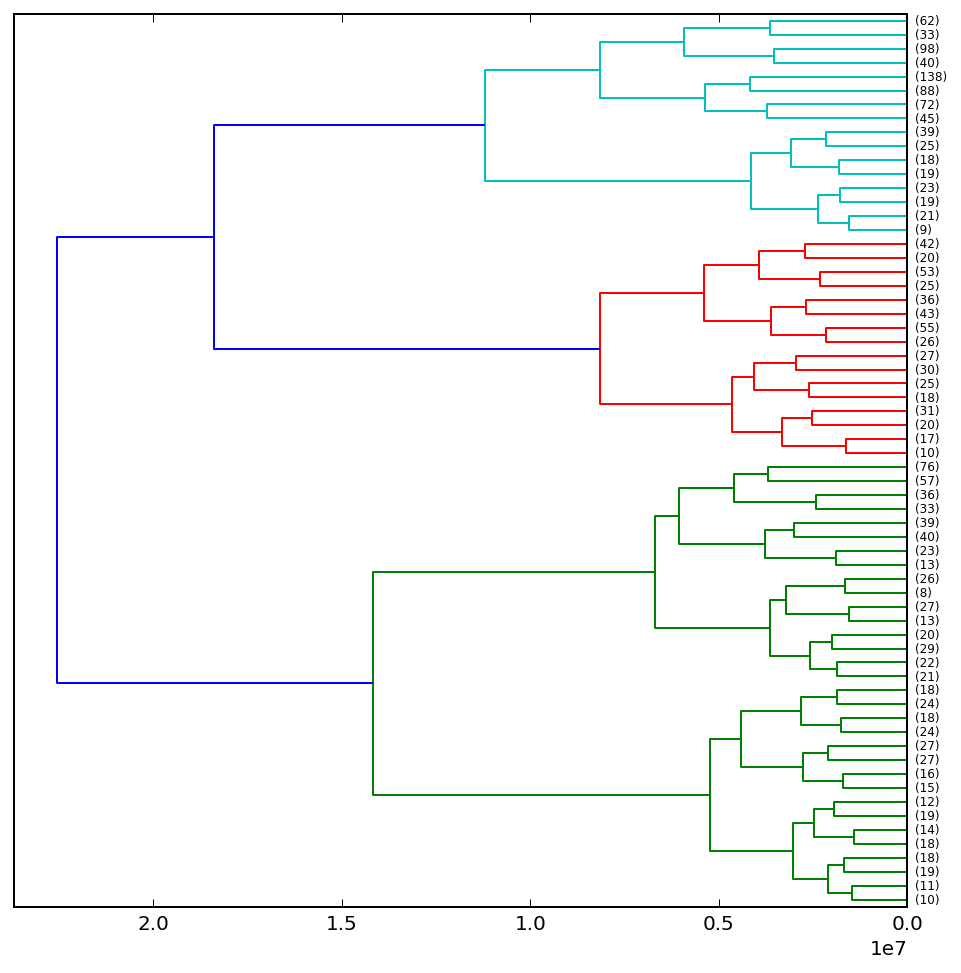

In [9]:
plt.figure(figsize=(8, 8))
fig = cluster.hierarchy.dendrogram(clusters, 
                                   p=5, 
                                   truncate_mode='level', 
                                   orientation='left',
                                   show_leaf_counts=True)
plt.show()

At least superficially, this looks very similar to the dendrogram in Reagan, et. al. 
But what do the clusters actually look like? Scipy gives us a neat tree
representation of the clusters that's easy to work with:

In [10]:
clustertree = cluster.hierarchy.to_tree(clusters)
def walk_to_threshold(ctree, threshold):
    if ctree.dist < threshold:
        yield ctree.pre_order()
    else:
        for c in walk_to_threshold(ctree.get_left(), threshold):
            yield c
        for c in walk_to_threshold(ctree.get_right(), threshold):
            yield c

main_clusters = list(walk_to_threshold(clustertree, 8000000))
print('There are {} clusters at a distance threshold of 8000000.'.format(len(main_clusters)))
print()
for i, c in enumerate(main_clusters):
    print('Cluster {} has {} items.'.format(i, len(c)))

There are 7 clusters at a distance threshold of 8000000.

Cluster 0 has 290 items.
Cluster 1 has 483 items.
Cluster 2 has 178 items.
Cluster 3 has 300 items.
Cluster 4 has 173 items.
Cluster 5 has 343 items.
Cluster 6 has 233 items.


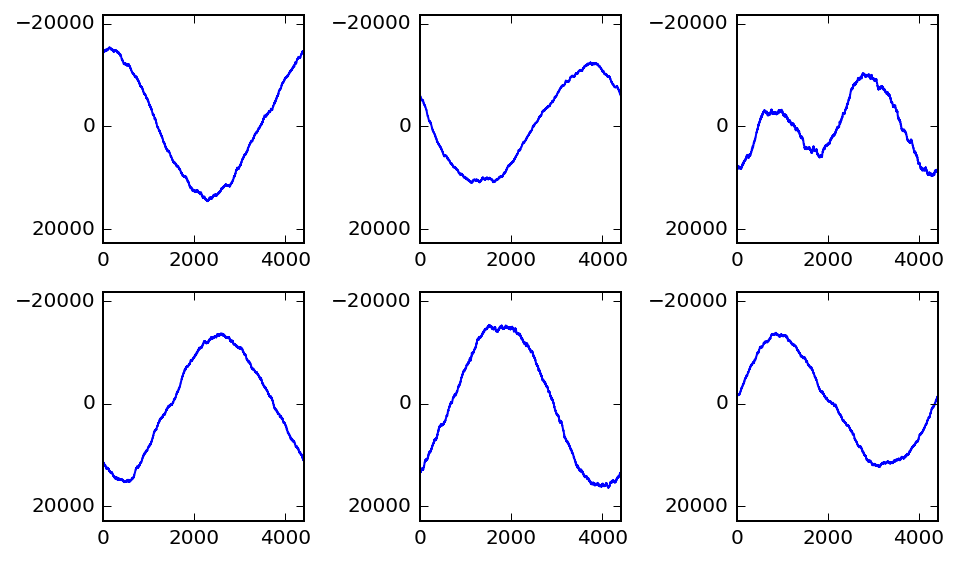

In [11]:
cluster_bases = [samples_brn.T[c].mean(axis=0)
                 for c in main_clusters][0:6]
plot_bases(cluster_bases, 2, 3, 3, 4)

The results aren't as stable as those produced by SVD -- they change a little bit every
time this notebook is run. This method seems to be more sensitive to horizontal translation, 
creating clusters of samples that are similar, but shifted to the right or left. Still, they 
are reasonably similar to the SVD curves, and they are also quite similar to those that 
appear in Reagan et. al. 

The word salad clusters in their paper are also easy to reproduce by rescaling our samples:

In [12]:
clusters = cluster.hierarchy.linkage(samples_low.T, 'ward', 'euclidean')

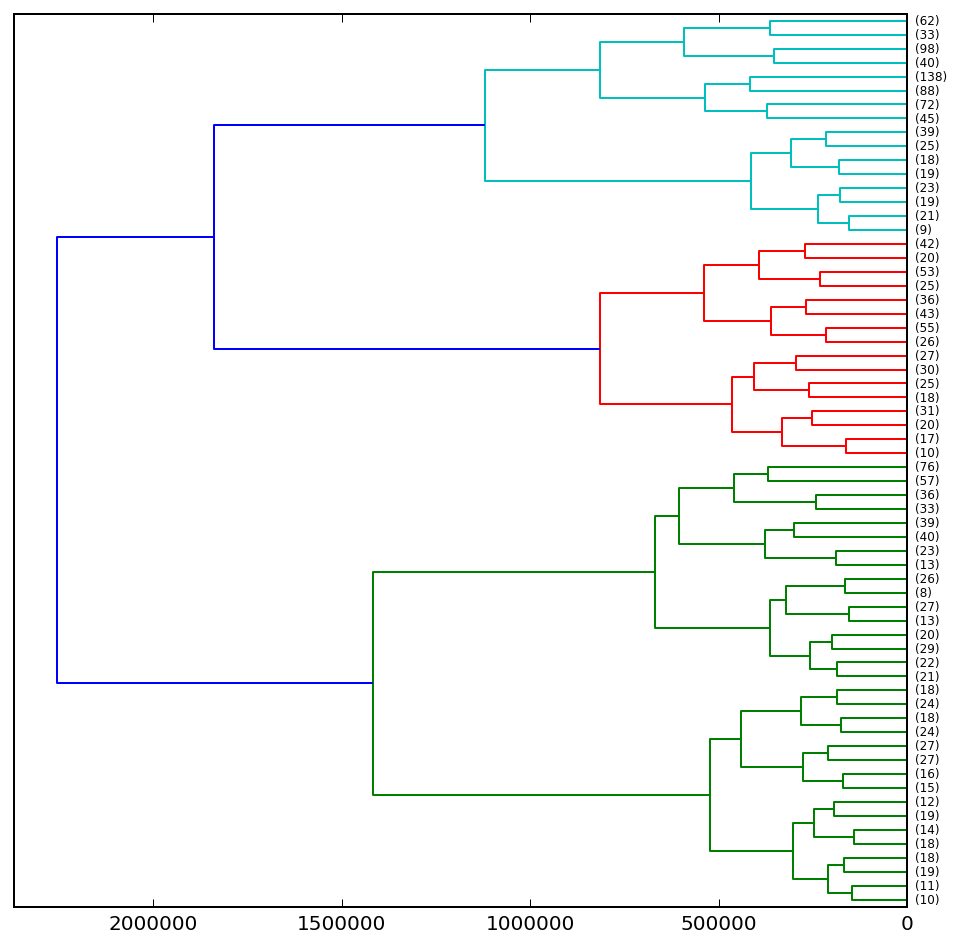

In [13]:
plt.figure(figsize=(8, 8))
fig = cluster.hierarchy.dendrogram(clusters, 
                                   p=5, 
                                   truncate_mode='level', 
                                   orientation='left',
                                   show_leaf_counts=True)
plt.show()

As you can see from the horizontal axis, the distance between clusters is now an order of
magnitude smaller, just as in Reagan et. al. That's not surprising, because we divided 
the amplitude by ten.

## Other Noise

Given that several of the major results that Reagan et. al. reported can be replicated with 
Brownian noise, it's worth looking at the SVD of other kinds of time series data to 
see what a really surprising result might look like. Let's begin with white noise.

### White noise

White noise differs from Brownian noise because Brownian noise has correlations that 
depend on distance, while white noise does not. In Brownian noise, samples that are close together 
in time are more likely to be similar in amplitude. But in white noise, samples that
are close together are completely independent. White noise seems unlikely to be a good model for 
sentiment data from a coherent narrative, but it's worth investigating if only to show the
range of sensitivity of SVD-based methods.

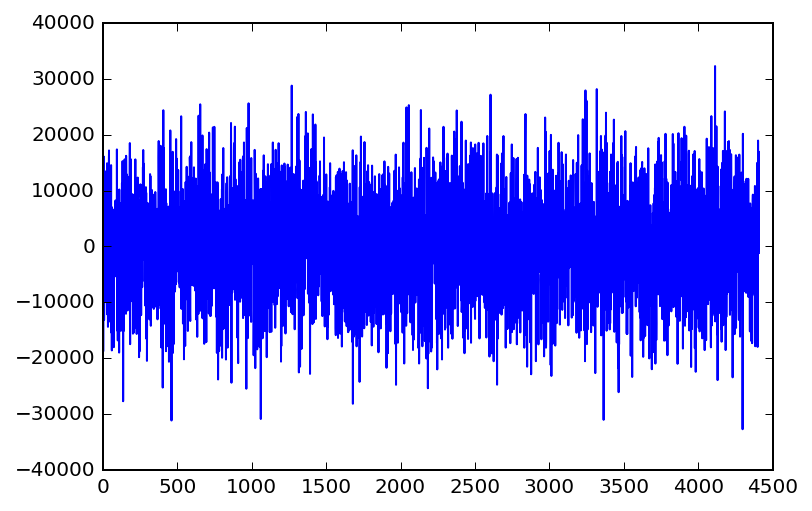

In [14]:
samples_wht = Noise(duration=0.1).white().resample_array(2000)

plt.plot(samples_wht[:,0])
plt.show()

In [15]:
U_wh, s_wh, V_wh = numpy.linalg.svd(samples_wht, full_matrices=False)
numpy.allclose(samples_wht, U_wh @ numpy.diag(s_wh) @ V_wh)

True

Since there are no correlations at all in this case, the SVD will probably have a hard time doing anything with the data...

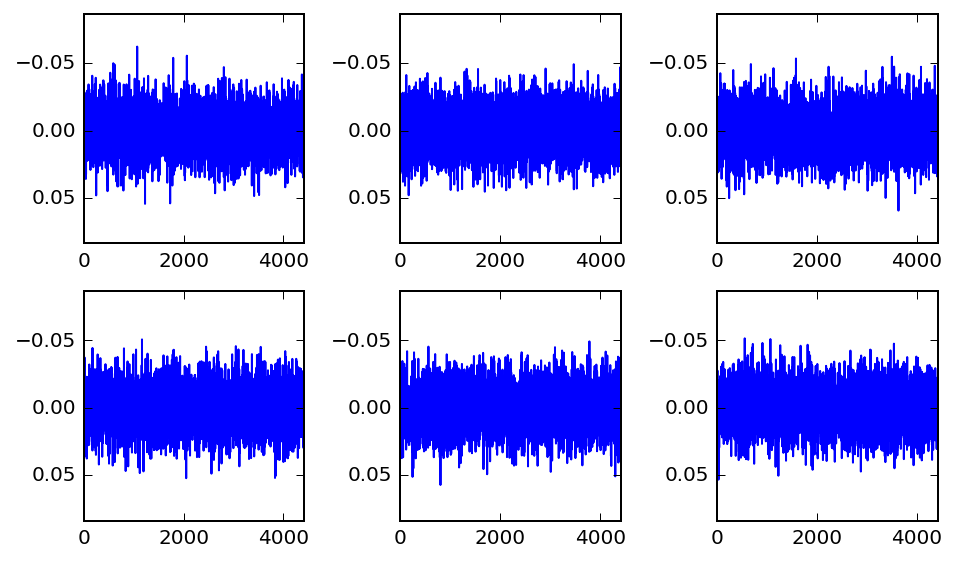

In [16]:
bases = [U_wh[:,i] for i in range(6)]
plot_bases(bases, rows=2, cols=3, xbins=3, ybins=5)

Indeed, it turns out that when you perform SVD on white noise, the basis 
functions are just more white noise. No more curvy 
eigenfunctions -- just static.

Also notice that the significance plot is basically flat. It goes
down a bit because of aliasing effects (I think). Still, after
one hundred values, the lowest value is still only 10% lower 
than the maximum:

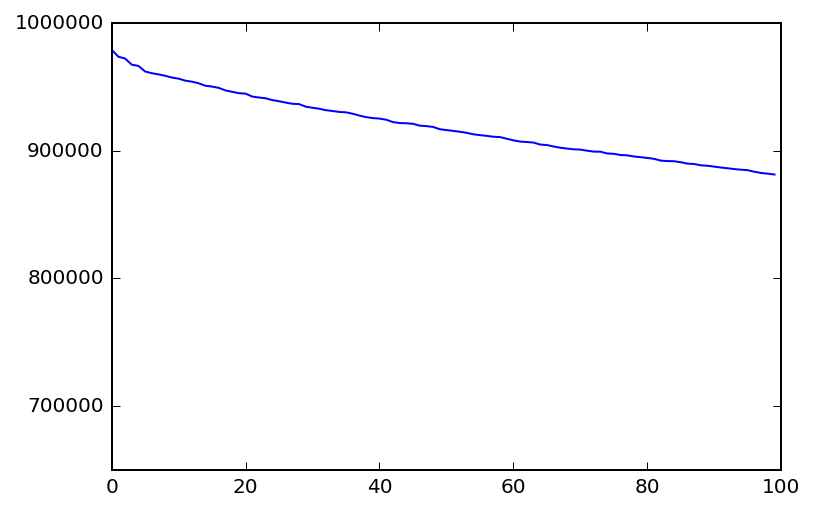

In [17]:
plt.plot(s_wh[0:100])
plt.locator_params(axis='y', nbins=6)
plt.axis([0, 100, 6.5 * 10 ** 5, 10 ** 6])
plt.show()

### Simulating fundamental arcs

We've seen that the SVD creates sinusoidal eigenfunctions
when we use Brownian noise, and random eigenfunctions when we
use white noise. What about when we use a mixture of 
deterministic functions and brownian noise? Let's start
by creating some random base modes:

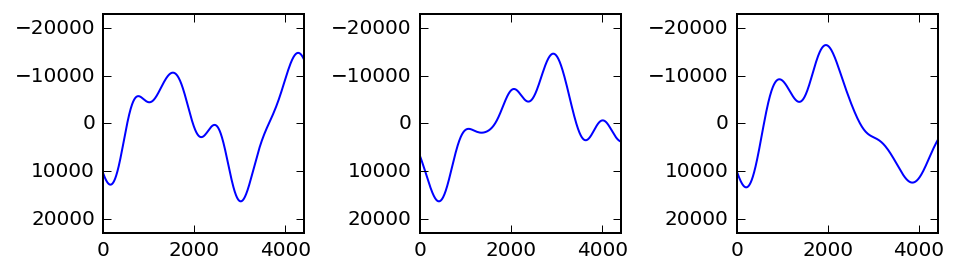

In [18]:
base_modes = [Noise(duration=0.1).white().gauss_filter(sample_width=0.5).wav().reshape(-1, 1) / 2
              for x in range(3)]

plot_bases(base_modes, rows=1, cols=3, xbins=3, ybins=5)

These are white noise signals filtered with a Gaussian filter,
which helps to ensure that the result won't be pure white noise.

Now we produce our signals by picking a random base mode for
each instance and adding some Brownian noise:

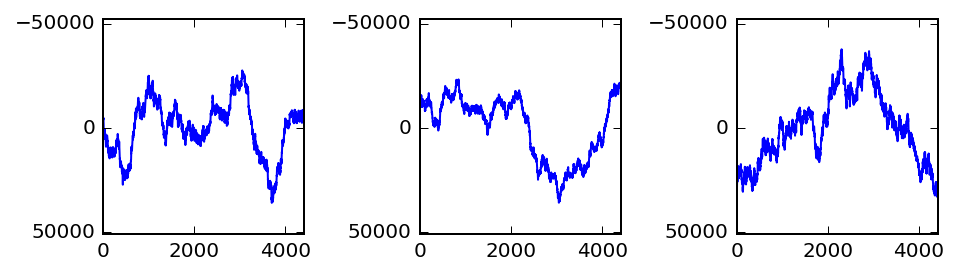

In [19]:
selector = numpy.random.random(2000) * 3
selector = selector.astype('int')
modes = [base_modes[x] for x in selector]
fixed_arcs = [Noise(duration=0.1).brownian().wav().reshape(-1, 1) + mode 
              for mode in modes]

fixed_arcs = numpy.hstack(fixed_arcs)

plot_bases([fixed_arcs[:,i] for i in range(3)], 
           rows=1, cols=3, xbins=3, ybins=5)

It's hard to tell the difference between this and 
plain old Brownian noise, right? But the SVD
gets it right away.

In [20]:
U_fix, s_fix, V_fix = numpy.linalg.svd(fixed_arcs, full_matrices=False)
numpy.allclose(fixed_arcs, U_fix @ numpy.diag(s_fix) @ V_fix)

True

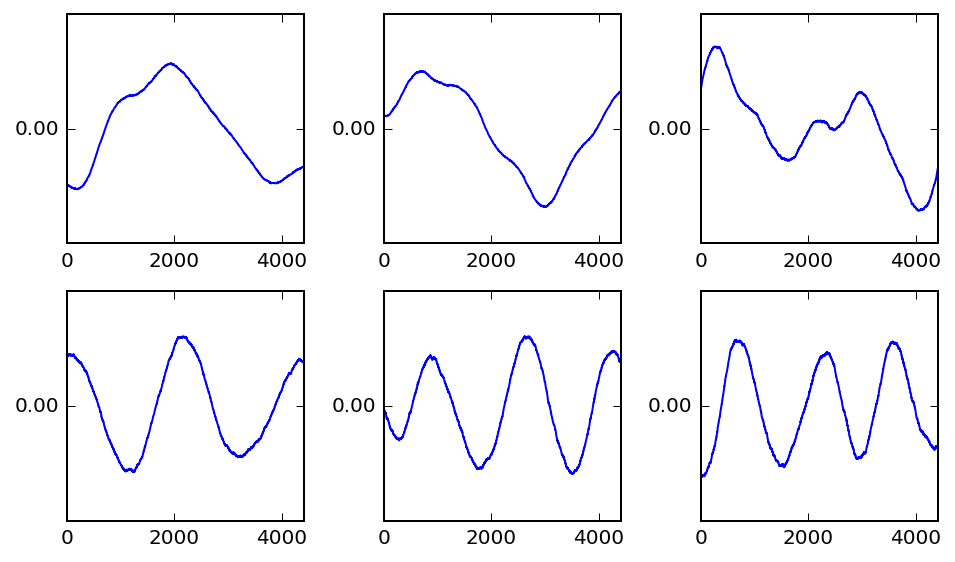

In [21]:
bases = [U_fix[:,i] for i in range(6)]
plot_bases(bases, rows=2, cols=3, xbins=3, ybins=5)

These still have a quasi-sinusoidal character, but they diverge
noticeably from the neat, clean curves generated by pure Brownian 
noise -- and by the data in Reagan, et. al.

### Smoothed white noise

Smoothing has interesting effects on these outcomes. Those effects raise questions about whether the input data that Reagan et. al. use even has a Brownian structure. The time series data they use in their analysis is smoothed using a simple moving average; their method has a few subtleties, but it boils down to a square low-pass filter -- that is, a filter that blocks high frequencies while allowing low frequencies to pass, and that weights samples from a block of time equally. When abused, that kind of filtering can introduce a Brownian signature into data that doesn't already have it.

Much of the detail in this section was inspired by conversations with Annie Swafford and Dan Lepage, whose thoughtful feedback helped me make sense of potential smoothing problems. Remaining errors and controversial opinions are my own.

Suppose the raw sentiment data that Reagan et. al. used was nothing more than white noise. Using a relatively mild filter, here's what it would look like.

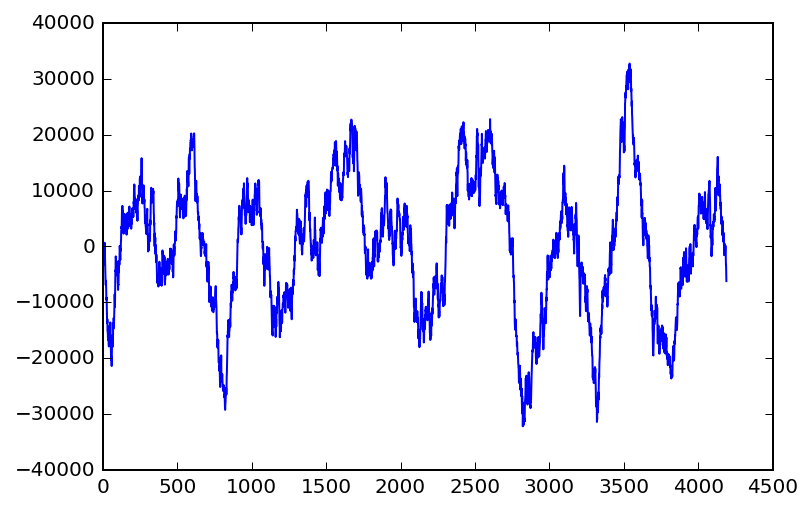

In [22]:
# Filter with a kernel 1/20th as long as the original sample:
samples_whf_a = (Noise(duration=0.1)
                 .white()
                 .square_filter(sample_width=0.05, edge_policy='valid')
                 .resample_array(2000))

plt.plot(samples_whf_a[:,0])
plt.show()

On the surface, it doesn't look so different from the Brownian noise samples we began with. But what does the SVD do with it?

In [23]:
U_whf_a, s_whf_a, V_whf_a = numpy.linalg.svd(samples_whf_a, full_matrices=False)
numpy.allclose(samples_whf_a, U_whf_a @ numpy.diag(s_whf_a) @ V_whf_a)

True

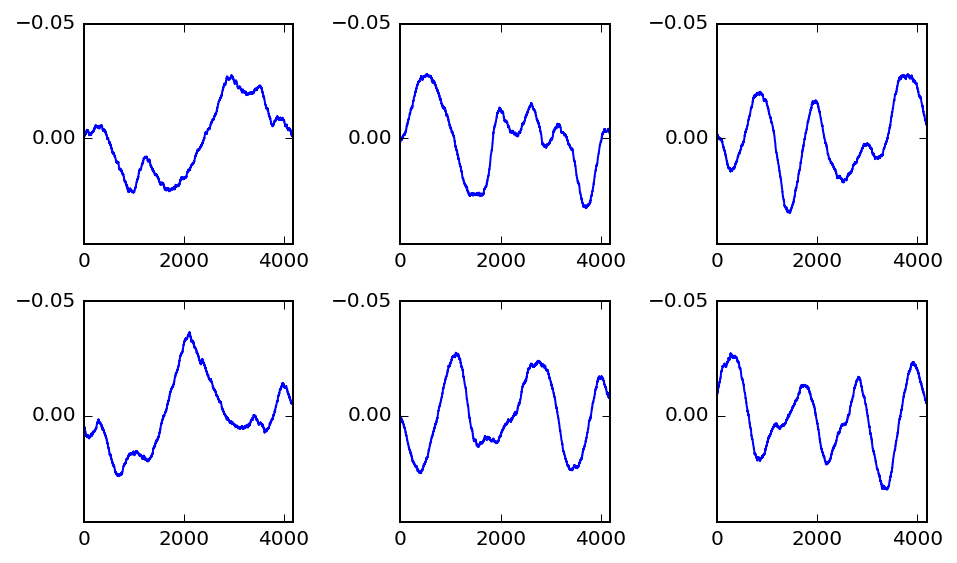

In [24]:
bases = [U_whf_a[:,i] for i in range(6)]
plot_bases(bases, rows=2, cols=3, xbins=3, ybins=5)

With white noise filtered using the above settings, the SVD produces base functions that are unmistakably different from those for both pure white noise and for Brownian noise. The significance values, when plotted, also have a distinctive shape. Rather than decaying smoothly and rapidly, they drop off moderately, then rapidly, then very slowly, with a noticeable articulation around the thirtieth value:

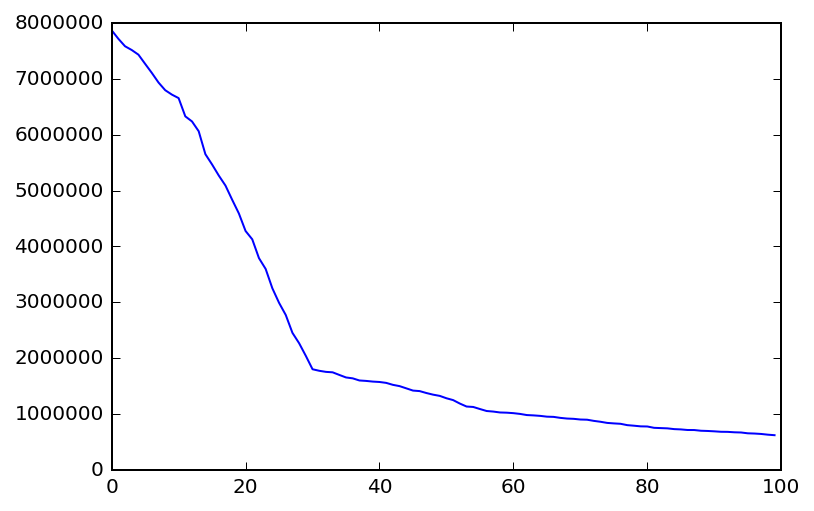

In [25]:
plt.plot(s_whf_a[0:100])
plt.show()

So far so good. It doesn't look like the unsmoothed data that Reagan et. al. used could have been white noise -- at least if the settings they used resembled the above. But there's reason to believe that they used more aggressive settings. What happens then?

Initially, things look nearly identical:

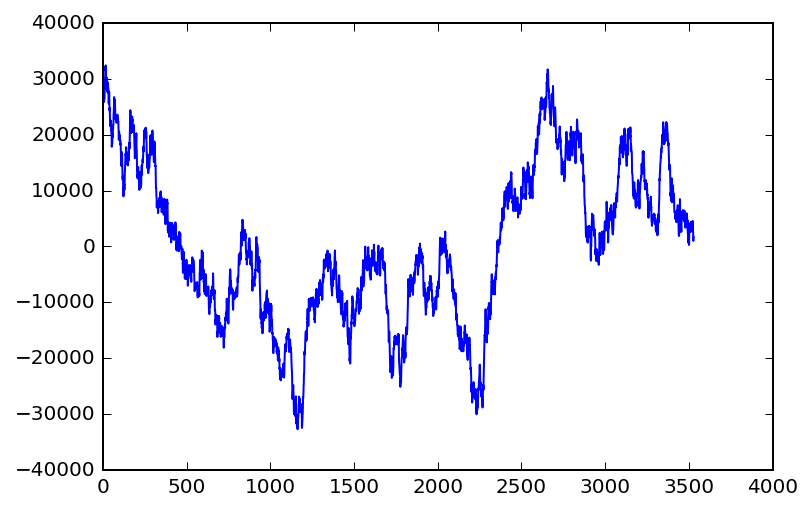

In [26]:
# Filter with a kernel 1/5th as long as the original sample:
samples_whf_b = (Noise(duration=0.1)
                 .white()
                 .square_filter(sample_width=0.2, edge_policy='valid')
                 .resample_array(2000))

plt.plot(samples_whf_b[:,0])
plt.show()

In [27]:
U_whf_b, s_whf_b, V_whf_b = numpy.linalg.svd(samples_whf_b, full_matrices=False)
numpy.allclose(samples_whf_b, U_whf_b @ numpy.diag(s_whf_b) @ V_whf_b)

True

Now look what happens to the first six base functions:

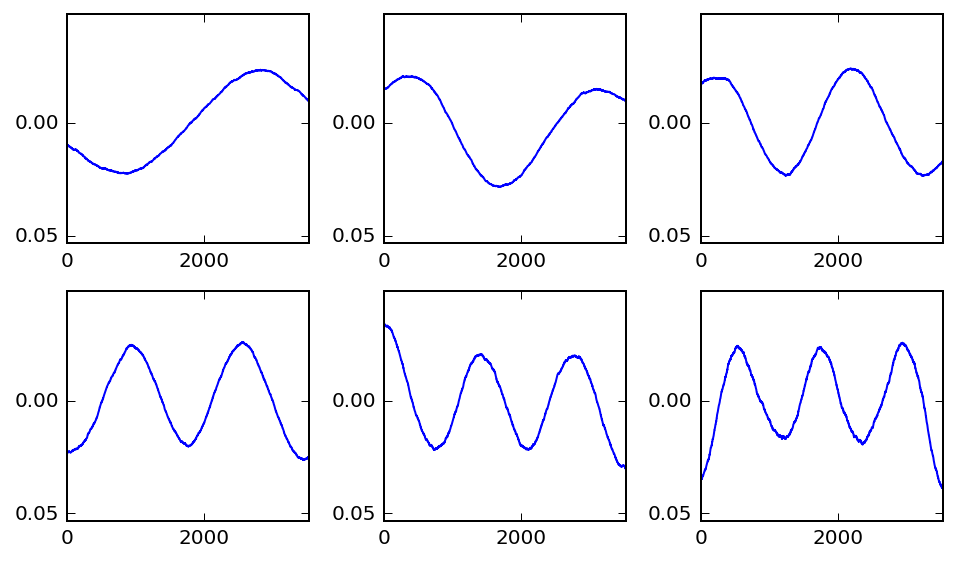

In [28]:
bases = [U_whf_b[:,i] for i in range(6)]
plot_bases(bases, rows=2, cols=3, xbins=3, ybins=5)

For a moment, it looks very bad for Reagan et. al. -- here we have some lovely sinusoidal shapes, just like the ones in their paper, arising from mere white noise.

But in their paper they also show a total of twelve base functions, and the next six base functions look quite different from theirs:

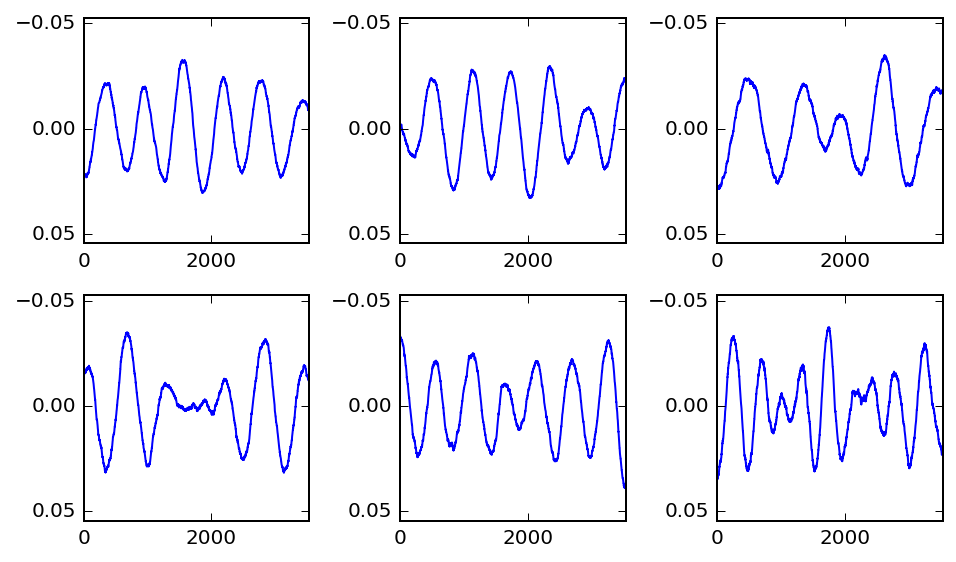

In [29]:
bases = [U_whf_b[:,i] for i in range(6, 12)]
plot_bases(bases, rows=2, cols=3, xbins=3, ybins=5)

The significance plot also looks more similar to the filtered white noise plot above than to the original Brownian noise plot. But Reagan et. al. report a smooth significance curve that looks much more like the Brownian noise plot.

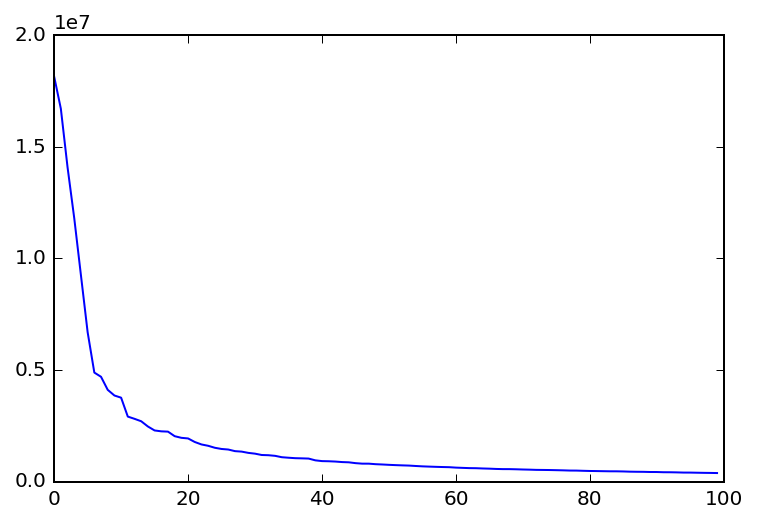

In [30]:
plt.plot(s_whf_b[0:100])
plt.show()

So it looks like we might still be able to tell the difference between smoothed white noise and Brownian noise, even at these settings.

### The worst case scenario

Eventually, at aggressive enough settings, the differences really do disappear:

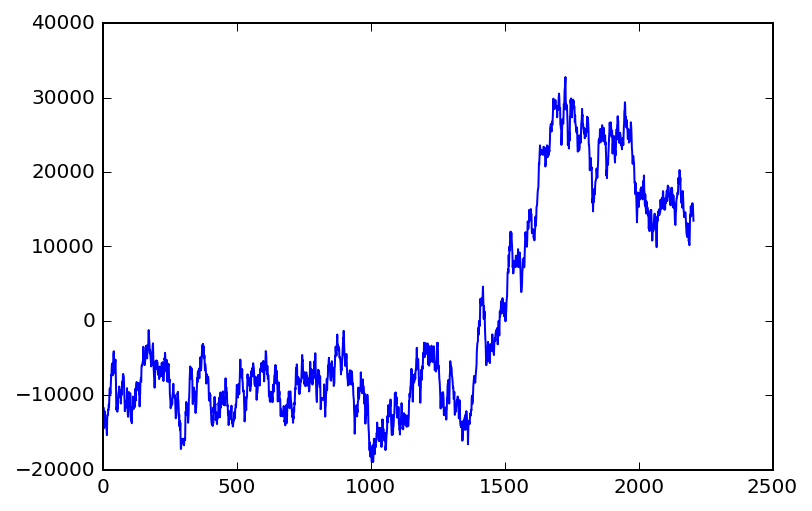

In [31]:
# Filter with a kernel 1/2 as long as the original sample:
samples_whf_c = (Noise(duration=0.1)
                 .white()
                 .square_filter(sample_width=0.5, edge_policy='valid')
                 .resample_array(2000))

plt.plot(samples_whf_c[:,0])
plt.show()

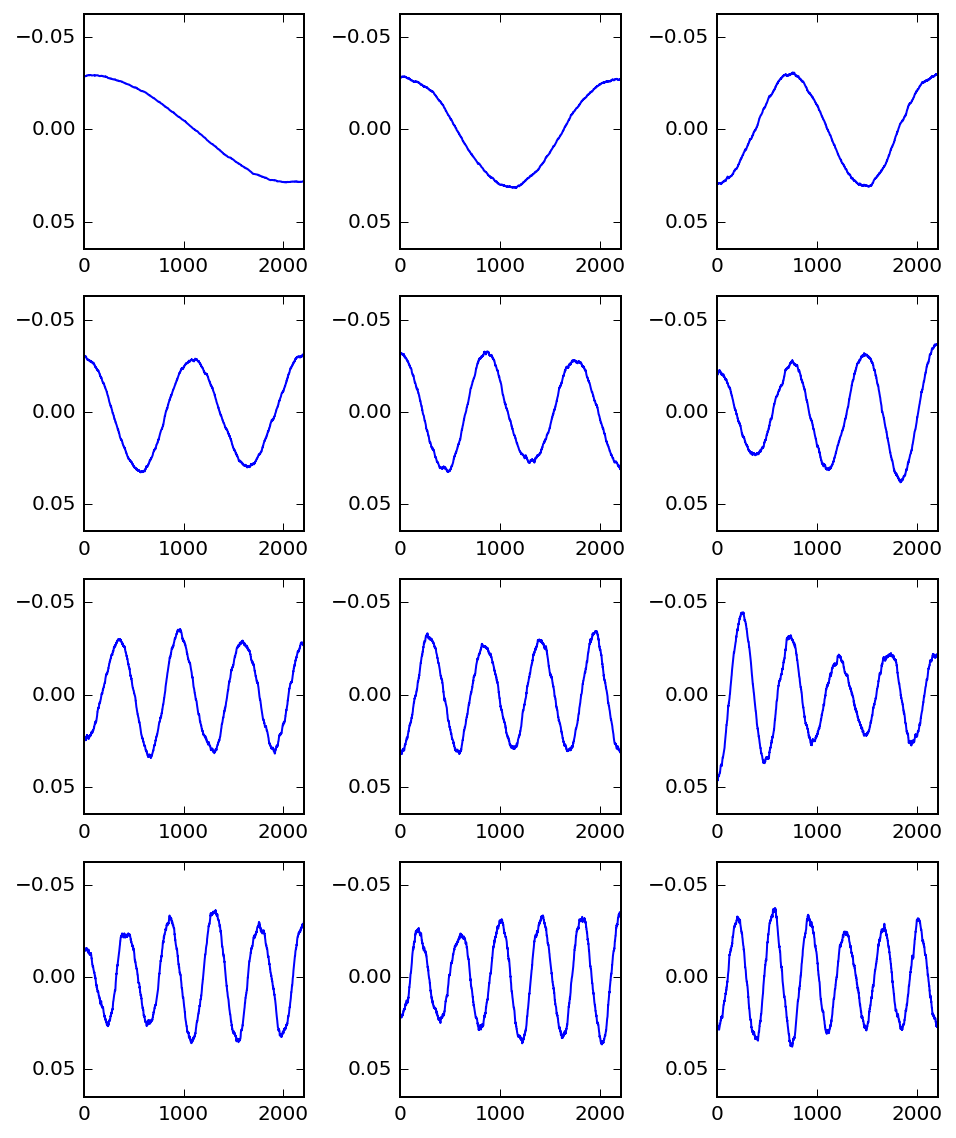

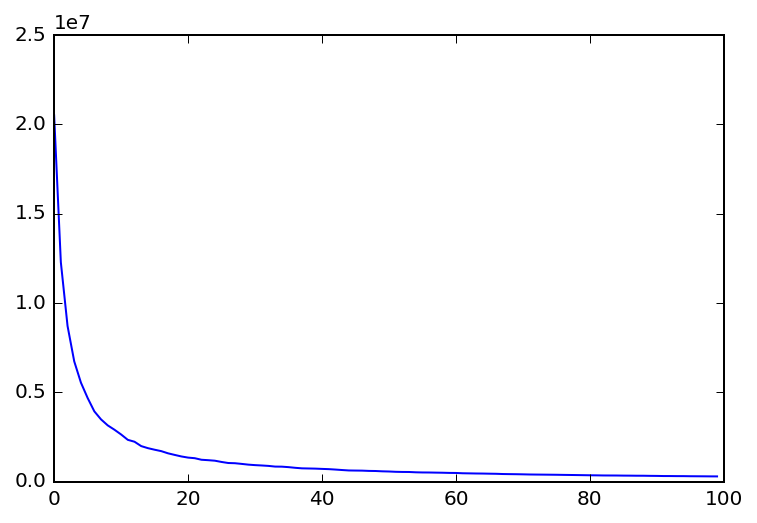

In [32]:
U_whf_c, s_whf_c, V_whf_c = numpy.linalg.svd(samples_whf_c, full_matrices=False)
assert numpy.allclose(samples_whf_c, U_whf_c @ numpy.diag(s_whf_c) @ V_whf_c)

bases = [U_whf_c[:,i] for i in range(12)]
plot_bases(bases, rows=4, cols=3, xbins=3, ybins=5)

plt.plot(s_whf_c[0:100])
plt.show()

This is to be expected. The filter's window is so large now that it overlaps with itself at every point. Every output sample is at least a little bit correlated with every other output sample. At these settings, the SVD of the smoothed values becomes essentially meaningless for our purposes. White noise smoothed this way will generate almost exactly the same results as Brownian noise for all the above tests.

The fundamental question here is whether Reagan et. al. pushed things this far. They report using a window of 10,000 words, and they also state that some of their texts are only 10,000 words long. As [Ben Schmidt](http://www.lagado.name/blog/brownian-noise-and-plot-arcs/comment-page-1/#comment-1494) pointed out to me, the rightmost chart on page S2 of their paper ([v2](https://arxiv.org/pdf/1606.07772v2.pdf)) suggests that the average length must be in the range of 10<sup>4.7</sup> $\approx$ 50,000 or 10<sup>4.8</sup> $\approx$ 63,000 words, but it's hard to be certain. If the average length of texts in their corpus is only 20,000 words, we should probably disregard their results entirely.

If the average length of texts in their corpus is 50,000 words or higher, then their results may provide some weak evidence that their raw sentiment data has Brownian-like qualities -- assuming the _other_ tweakable settings in their filter are correct.

### Stepwise filtering

The complexity of this problem is compounded by the fact that Reagan et. al. move their filter forward by more than one word for each smoothed sample. So in other words, instead of running the filter window over the text smoothly, taking and discarding one word at a time, they take and discard five or ten words at a time. They adjust the number of words so that the final number of samples is the same, but they don't specify that number. So the effects of this decision are almost impossible to speculate about. It would be prohibitively time-consuming to try all the possible combinations of settings to find those that produce good tests for Brownian noise.

However, the following two examples show settings that _could_, in principle, reveal Brownian noise that has been mixed with high amplitude white noise. I've modified the settings to be consistent with what we know about Reagan et. al.'s methods -- but generously so. This assumes their average text length was 100,000 words. Here's the white noise example:

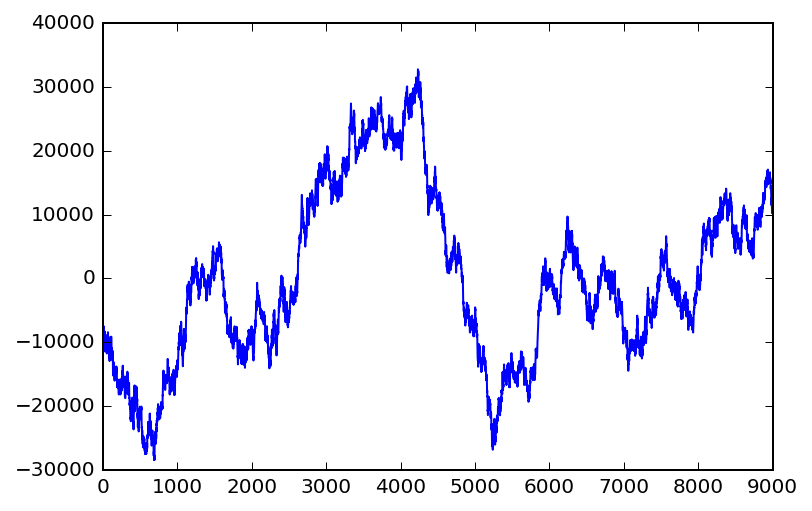

In [33]:
# `autofilter` divides the noise into bins and sums over them. Then we
# convolve as usual. This produces the same result as Reagan et. al.'s 
# stepwise filter.
samples_whf_stp = (Noise(sample_rate=100000)
                   .white()
                   .autofilter(sample_width=10)
                   .square_filter(sample_width=1000, edge_policy='valid')
                   .resample_array(2000))

plt.plot(samples_whf_stp[:,0])
plt.show()

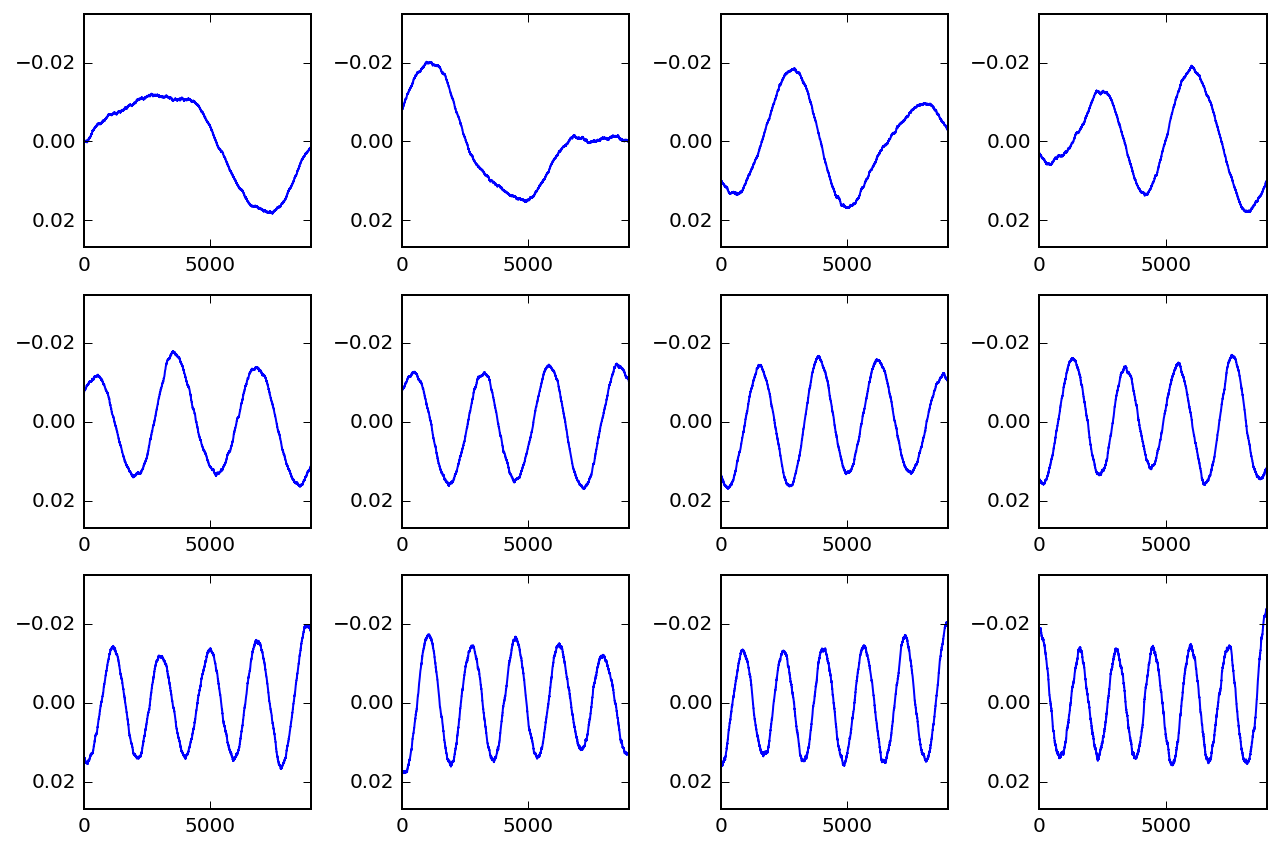

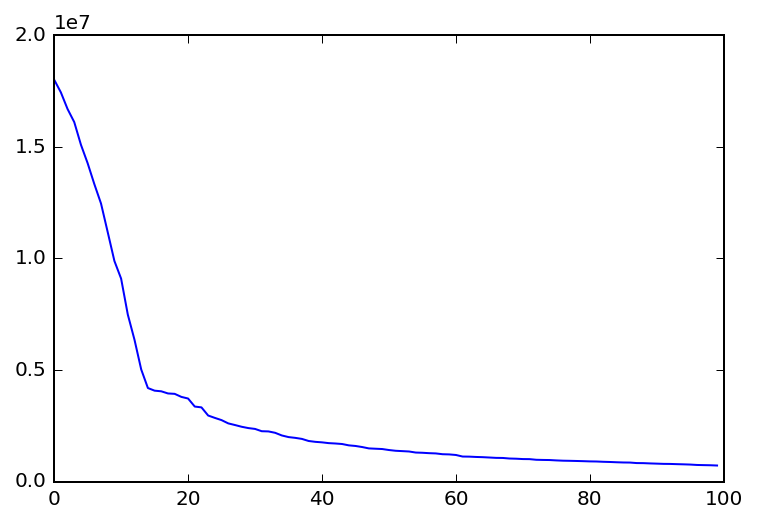

In [34]:
U_whf_stp, s_whf_stp, V_whf_stp = numpy.linalg.svd(samples_whf_stp, full_matrices=False)
assert numpy.allclose(samples_whf_stp, U_whf_stp @ numpy.diag(s_whf_stp) @ V_whf_stp)

bases = [U_whf_stp[:,i] for i in range(12)]
plot_bases(bases, rows=3, cols=4, xbins=3, ybins=5)

plt.plot(s_whf_stp[0:100])
plt.show()

Using this method, the high frequency signals look as if they might have been generated by Brownian noise, but the low-frequency signals are odd-looking. It's not a vivid difference, but it's a noticeable one. The significance plot also has the characteristic articulation point that we've seen in other such plots.

These details add up to something more persuasive when we look at the example with Brownian noise mixed in. Even if we add just a very small amount of Brownian noise, we get much smoother curves. 

Unfiltered, the noise is indistinguishable from white noise:

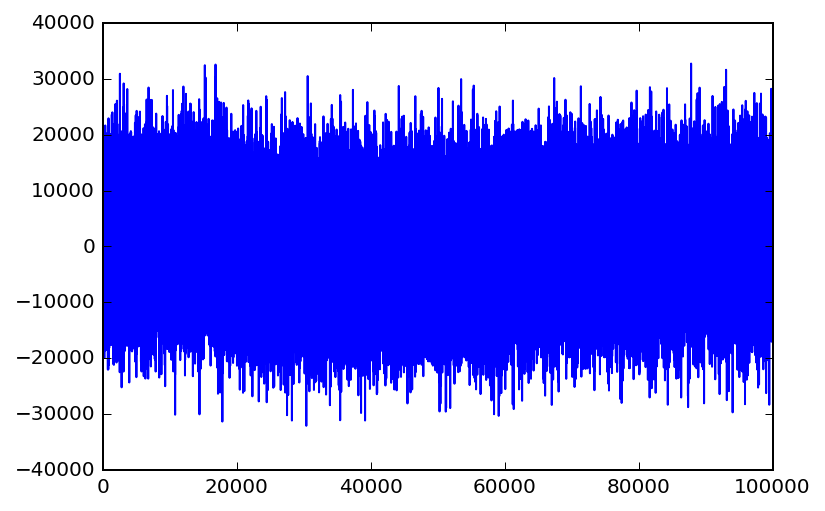

In [35]:
# Add white noise to brownian noise, at 1000x the amplitude
plt.plot(Noise(sample_rate=100000).brownian()
                                  .white(proportion=0.999)
                                  .wav()
                                  .reshape(-1, 1))
plt.show()

After filtering it looks much more Brownian:

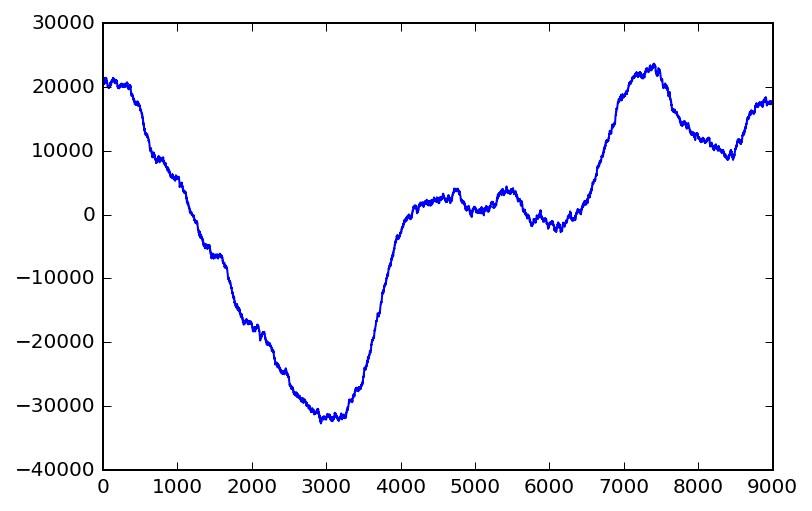

In [36]:
samples_brf_stp = (Noise(sample_rate=100000)
                   .brownian()
                   .white(proportion=0.999)
                   .autofilter(sample_width=10)
                   .square_filter(sample_width=1000, edge_policy='valid')
                   .resample_array(2000))

plt.plot(samples_brf_stp[:,0])
plt.show()

But is it?

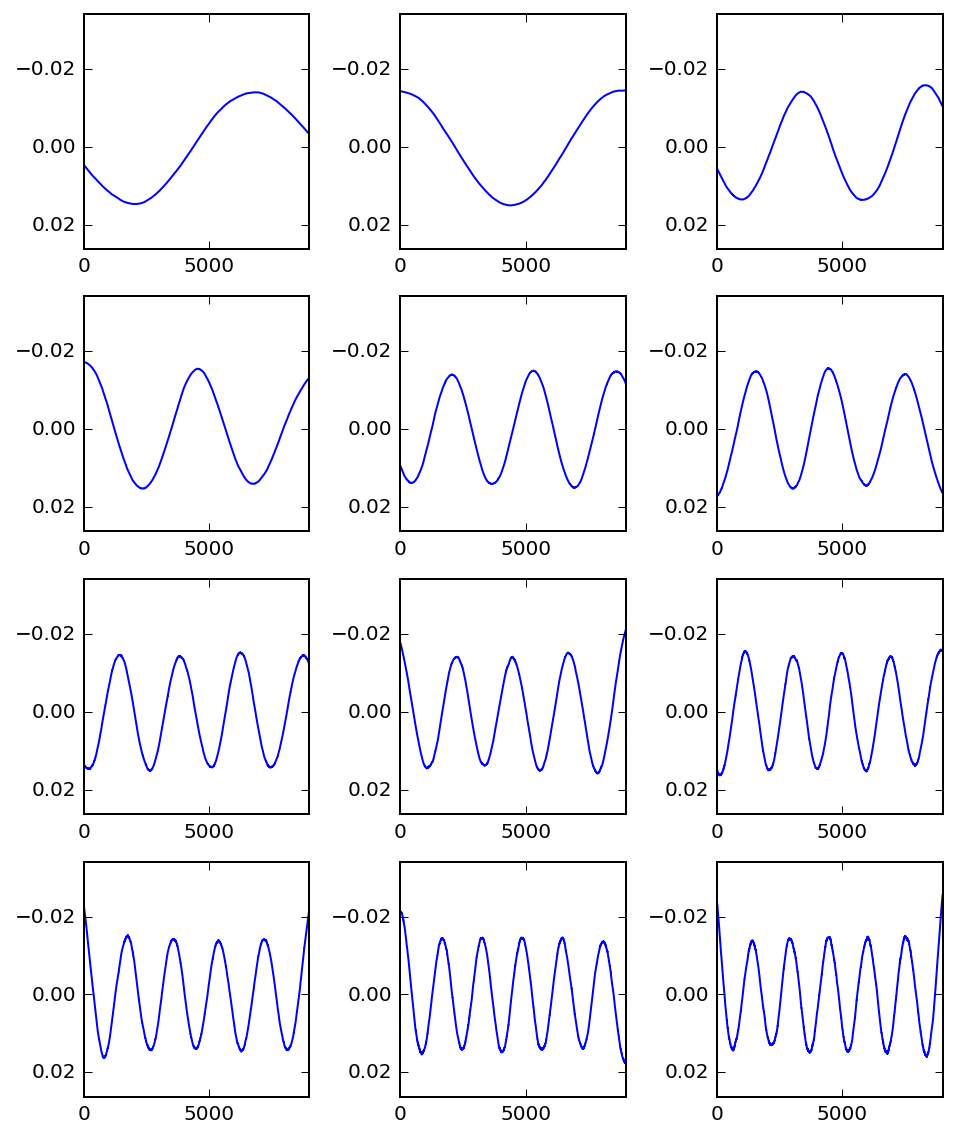

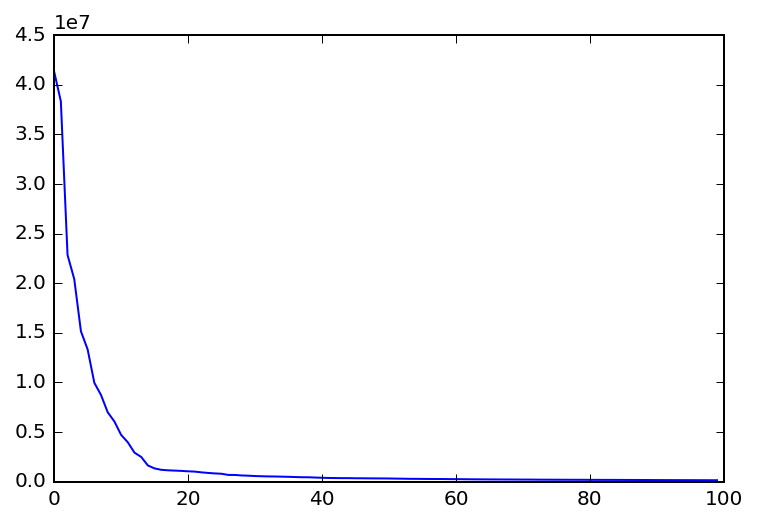

In [37]:
U_brf_stp, s_brf_stp, V_brf_stp = numpy.linalg.svd(samples_brf_stp, full_matrices=False)
assert numpy.allclose(samples_brf_stp, U_brf_stp @ numpy.diag(s_brf_stp) @ V_brf_stp)

bases = [U_brf_stp[:,i] for i in range(12)]
plot_bases(bases, rows=4, cols=3, xbins=3, ybins=5)

plt.plot(s_brf_stp[0:100])
plt.show()

These basis function curves are much more typical of Brownian noise, and are also extremely smooth. Although the significance plot shows an articulation point, its shape to the left of that point is concave, while the shape of that region of the chart for pure white noise is convex.

It would be nice to be able to rely on less purely qualitative judgments about these curves. There might be ways to give confidence intervals for these tests, but that's beyond the scope of this notebook. Still, this gives us some reason to believe that under the right conditions, a test like this really could reveal an underlying Brownian signal masked by high-volume white noise.

## Better Tests?

Although the above tests might filter out white noise, are there better tests? In the following plots, I show a promising method of attenuating white noise and amplifying Brownian noise that does not suffer from the same problems that window-based smoothing suffers from. It's based on this principle: when you divide a noisy signal into bins, and create a new signal by taking the sum of the values in each of the bins, local correlations will be amplified. If you take the average, the output will have lower amplitude for white noise, but it will have the same amplitude for Brownian noise.

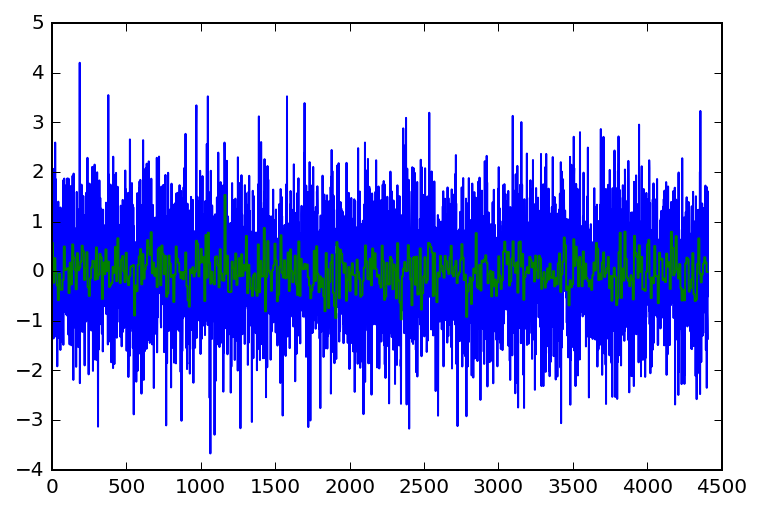

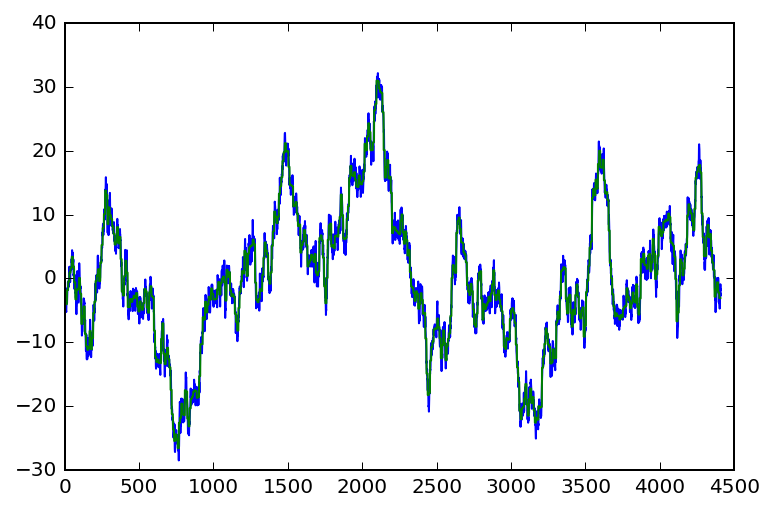

In [38]:
wn = Noise(duration=0.1).white()
plt.plot(wn.samples)
wn_au = wn.autofilter(8).samples
wn_stretch = numpy.zeros(len(wn_au) * 8)  
for i in range(8):                        # Create "stretched" version, which makes the
    wn_stretch[i::8] = wn_au              # filtered and unfiltered plots easier to compare
plt.plot(wn_stretch)
plt.show()

bn = Noise(duration=0.1).brownian()
plt.plot(bn.samples)
bn_au = bn.autofilter(8).samples
bn_stretch = numpy.zeros(len(bn_au) * 8)  
for i in range(8):
    bn_stretch[i::8] = bn_au
plt.plot(bn_stretch)
plt.show()

The following test exploits that principle without introducing deceptive local correlations. It does not produce smoother base functions -- in that sense, it is far worse than window-based smoothing. But it is better in the sense that it is guaranteed not to produce a false Brownian signature. The sums are taken over disjoint bins, so any correlation between the resulting values must have been present beforehand.

This test can detect Brownian noise mixed with white noise that is a thousand times louder without introducing any local correlation between samples.

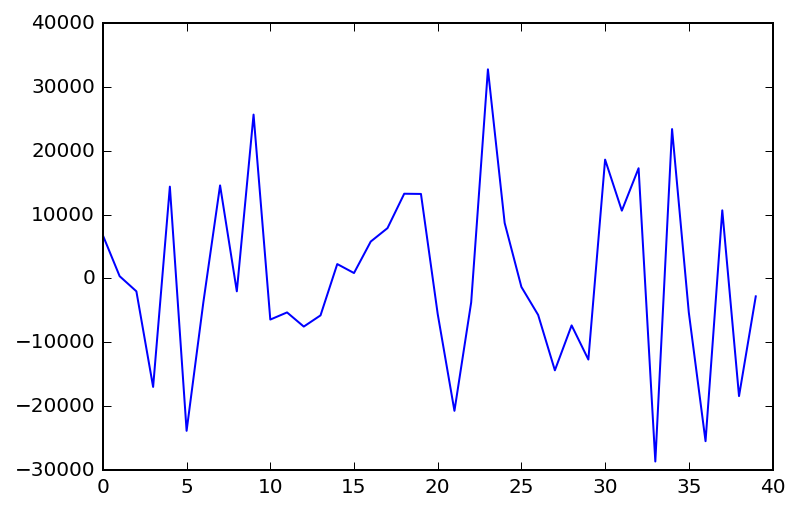

In [39]:
samples_wh_auf = (Noise(sample_rate=10000)
                  .white()
                  .autofilter(sample_width=250, mean=True)
                  .resample_array(2000))

plt.plot(samples_wh_auf[:,0])
plt.show()

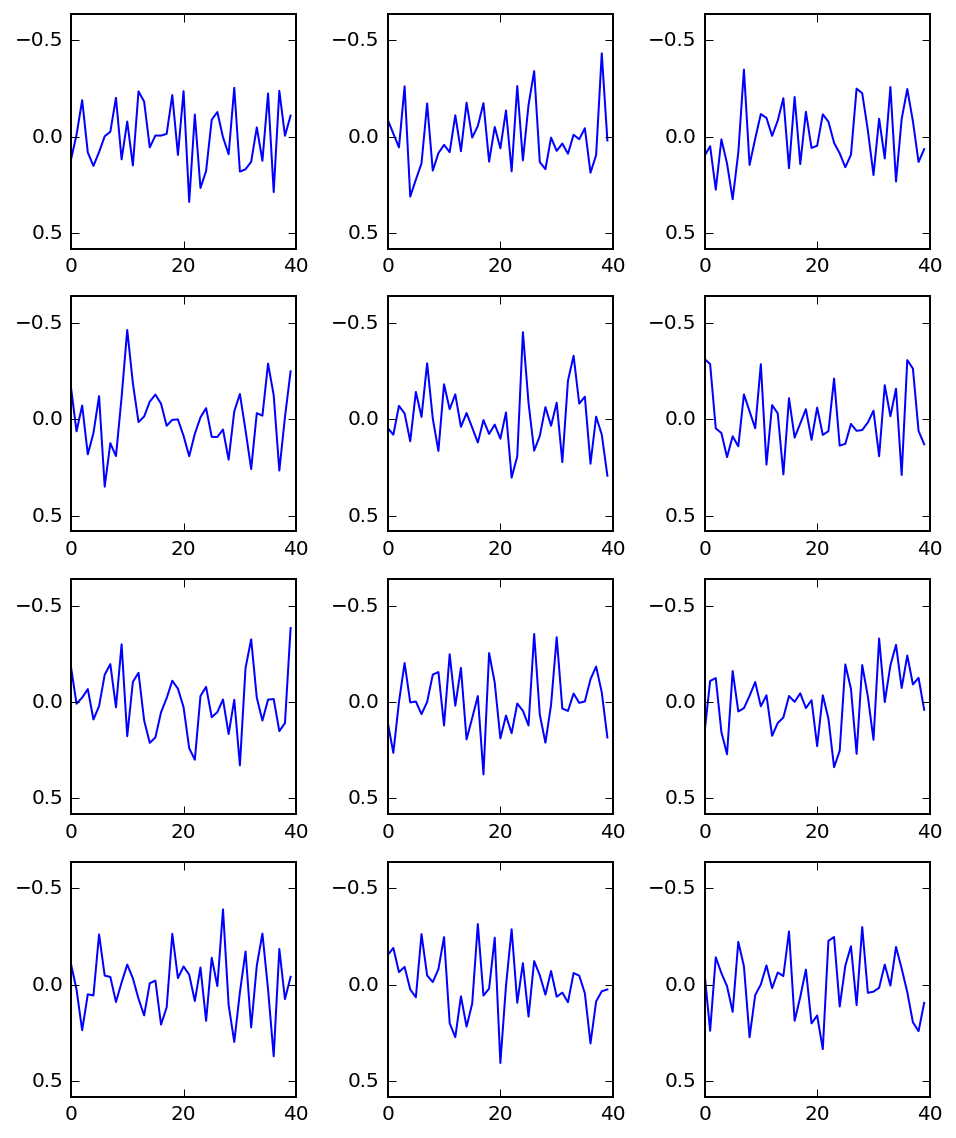

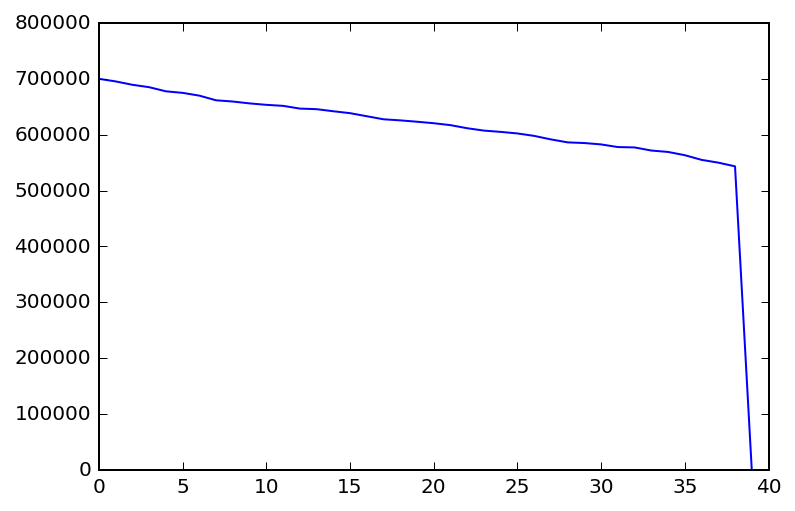

In [40]:
U_wh_auf, s_wh_auf, V_wh_auf = numpy.linalg.svd(samples_wh_auf, full_matrices=False)
assert numpy.allclose(samples_wh_auf, U_wh_auf @ numpy.diag(s_wh_auf) @ V_wh_auf)

bases = [U_wh_auf[:,i] for i in range(12)]
plot_bases(bases, rows=4, cols=3, xbins=3, ybins=5)

plt.plot(s_wh_auf[0:100])
plt.show()

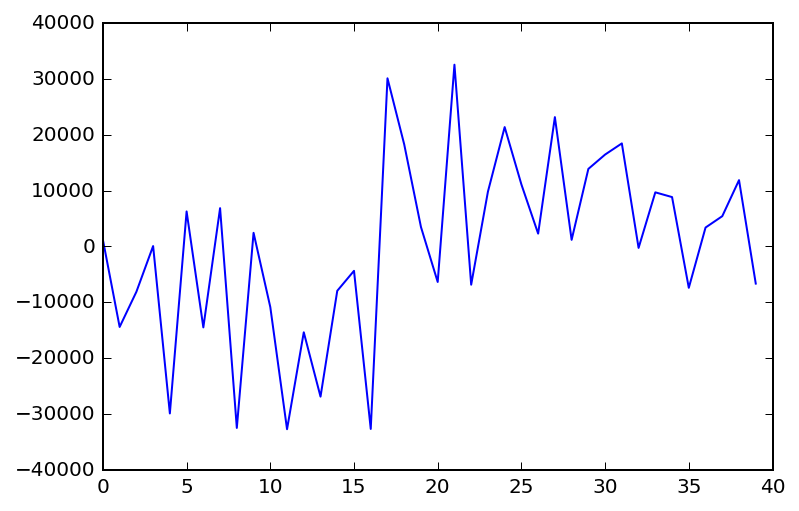

In [41]:
samples_br_auf = (Noise(sample_rate=10000)
                  .brownian()
                  .white(proportion=0.999)
                  .autofilter(sample_width=250, mean=True)
                  .resample_array(2000))

plt.plot(samples_br_auf[:,0])
plt.show()

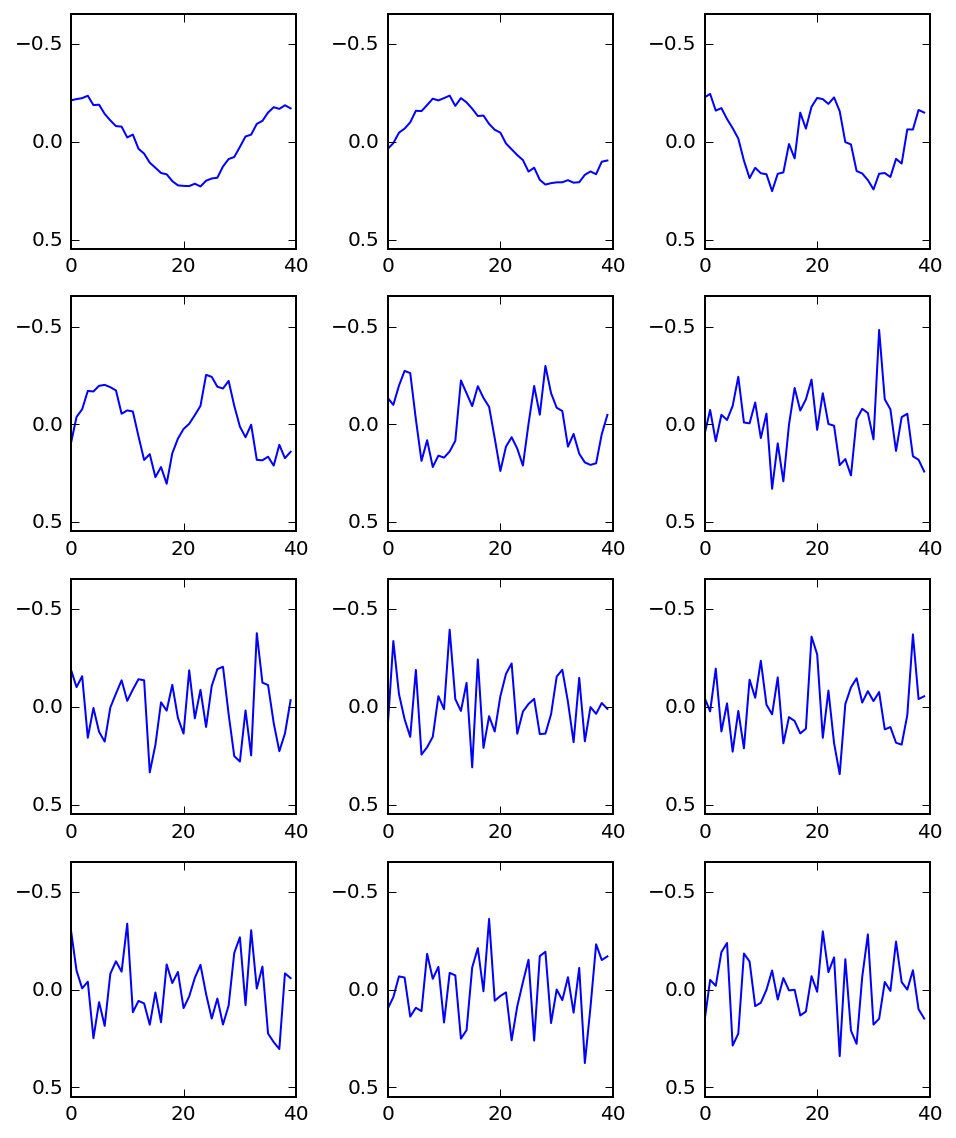

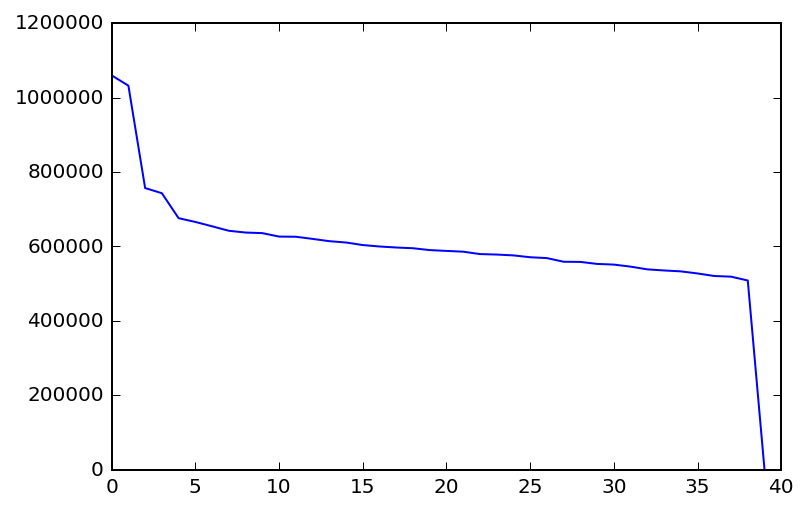

In [42]:
U_br_auf, s_br_auf, V_br_auf = numpy.linalg.svd(samples_br_auf, full_matrices=False)
assert numpy.allclose(samples_br_auf, U_br_auf @ numpy.diag(s_br_auf) @ V_br_auf)

bases = [U_br_auf[:,i] for i in range(12)]
plot_bases(bases, rows=4, cols=3, xbins=3, ybins=5)

plt.plot(s_br_auf[0:100])
plt.show()

The signature of Brownian noise is clearly visible here, both in the base functions and in the plot of singular values. Whereas the white noise singular values are almost totally flat, the Brownian noise singular values drop off quickly at first, and then reach a plateau. The first two base functions of the Brownian noise are also plainly sinusoidal, and the third and fourth also have a suggestively sinusoidal shape. If this test were to generate such shapes on Reagan et. al.'s raw data, it would constitute reasonably strong evidence that the raw data has a Brownian component.

# An Afterword
<img src="portrait_no_last_third1.png" alt="A sentiment plot of Joyce's Portrait of the Artist as a Young Man with the last third flattened." style="width: 350px; float: right; margin: 15px"/>
One of the most interesting parts of last year's Swafford-Jockers debate was their discussion of ringing artifacts. Swafford came up with an [ingenious way](https://annieswafford.wordpress.com/2015/03/07/continuingsyuzhet/) to show that the Fourier transform was creating distortions that were not justified by the data: she flattened the last third of a book's sentiment data, and found that the Fourier transform that resulted was nearly identical. Clearly the Fourier transform was imposing a bias that had distorted the data significantly.

Jockers' response was [equally ingenious](http://www.matthewjockers.net/2015/03/24/ringing_endorsement/). He argued that the distortion was desirable -- that the assumptions it arose from were actually recreating information about the book that had been removed. But at that point, the discussion reached a standstill, because there was no way to validate Jockers' claim. We had no good reason to assume that the sinusoidal basis functions were capturing anything particularly true about the novel.

If it turns out that random walks actually do a good job modeling sentiment data, then the Karhunen-Loève theorem gives us a very good reason. During the initial debate, I found Jockers' response to Swafford at least partially persuasive, because the test data that Swafford created just looks... wrong. And if sentiment time series are produced by random walks, then it really is wrong -- a flat line like that is, for all intents and purposes, impossible to generate with a random walk.

What's exciting is that the Karhunen-Loève (KL) theorem gives us a way to validate that claim. The theorem states that the KL decomposition of time series data produces basis functions that give the best possible approximation of that data, as measured by mean square error. And it's readily apparent that the Fourier transform of Swafford's data is a _terrible_ approximation of it. That was the whole basis of Swafford's argument.

On that same basis, given the KL theorem, we should expect the decomposition of data that has lots of such artifacts to be non-sinusoidal. 

And indeed it is:

In [43]:
samples_sw = Noise(duration=0.1).brownian().resample_array(2000)

samples_sw[-samples_sw.shape[0] // 3:, 
           :samples_sw.shape[1] // 2] = 0

In [44]:
U_sw, s_sw, V_sw = numpy.linalg.svd(samples_sw, full_matrices=False)
numpy.allclose(samples_sw, U_sw @ numpy.diag(s_sw) @ V_sw)

True

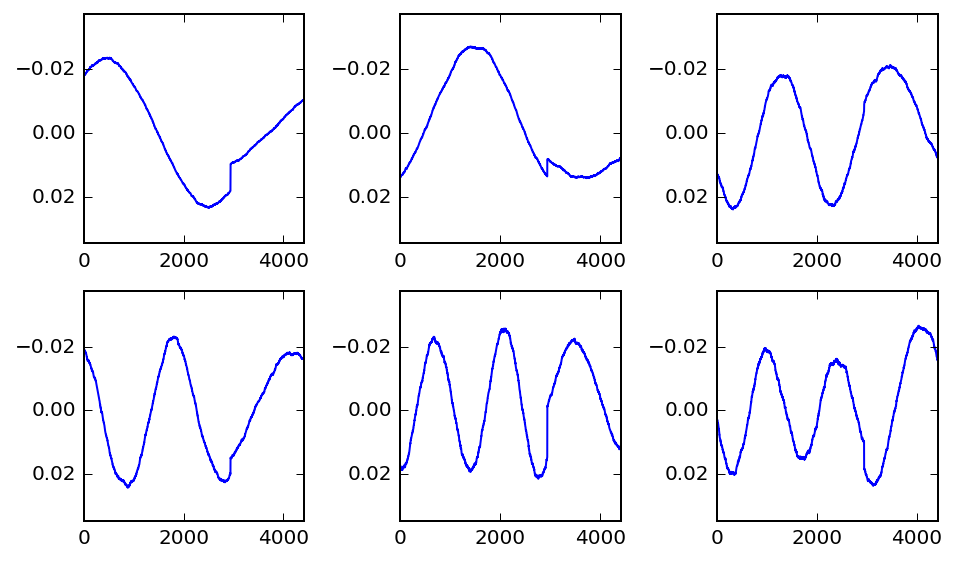

In [45]:
bases = [U_sw[:,i] for i in range(6)]
plot_bases(bases, rows=2, cols=3, xbins=3, ybins=5)

The effect is subtle but immediately noticeable. At the same point in every graph, two-thirds of the way through, there's a sudden jump upwards or downwards. In some cases it's more noticeable than in others, but it's always there. And it means that this decomposition is far better at approximating this kind of data:

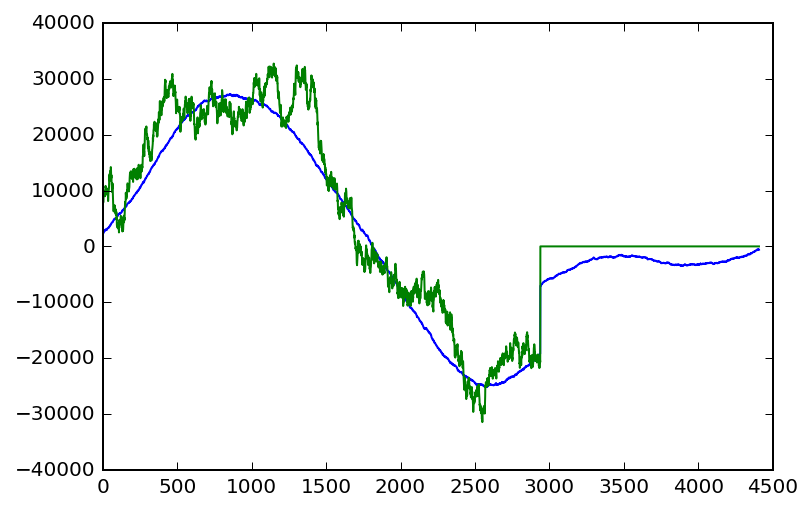

In [46]:
approx = U_sw[:,0:6] @ numpy.diag(s_sw[0:6]) @ V_sw[0:6,:]
plt.plot(approx[:,0])
plt.plot(samples_sw[:,0])
plt.show()

We don't know whether sentiment data really fits the random walk model, and this can't
tell us anything about that. But if we can develop good evidence for that claim, then
the KL theorem gives us a way to evaluate tests like these. Data that doesn't
produce a Fourier-like SVD isn't likely to be useful for testing methods designed 
for analyzing Brownian noise.

As we gain more clarity about these matters, Swafford's critique on this narrow point
may lose some of its force. But if that happens, it will reaffirm her more fundamental
argument. If we accept the utility of the Fourier transform for sentiment analysis, 
then we are essentially _assuming_ that our data has been generated by random walks, and 
that all other generalizations must be rejected out of hand. We can have grand 
generalizations about _Homo Narrativus_ or Fourier transforms -- but not both.